# Working with iPython Widgets

## Standard imports

In [2]:
%matplotlib inline
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets.widgets import Text, FloatSlider, IntSlider, RadioButtons
from ipywidgets.widgets import Checkbox, Box
import ipywidgets as widgets
from IPython.display import display
sns.set_style('dark')

# print(sys.version)
# print(sys.prefix)

## Interacting with a widget
The easy way to make an interactive widget is to use the `interact()` method. If you don't specify a widget type, it will use an `IntSlider`. 

In [3]:
def f(x=0):
    print(x)

widgets.interact(f, x=(0,10))

interactive(children=(IntSlider(value=0, description='x', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.f(x=0)>

`interact()` can be used as a decorator, as well

In [4]:
@widgets.interact(x=(0,10))
def f(x=0):
    print(x)

interactive(children=(IntSlider(value=0, description='x', max=10), Output()), _dom_classes=('widget-interact',…

## Simple text-entry widget
This widget accepts user input. When the user presses Enter, it calls the callback function. 

In [5]:
text = Text()  # text input widget

# event handler for input widget
def handle_submit(input_text):
    print("input_text:", input_text)

text.on_submit(handle_submit)  # add handler to widget
display(text)  # 

Text(value='')

input_text: Text(value='wombats')


## Crate a dataframe of airport boarding information
We'll read in a CSV file containing boarding info for the busiest 50 airports in the US. This will provide some data for us to display.

In [9]:


df = pd.read_csv(
    '../DATA/airport_boardings.csv',
    thousands=',',
    skipinitialspace=True,
)

df.head()


,Airport,Code,2001 Rank,2001 Total,2010 Rank,2010 Total,2011 Rank,Total,Percent change 2001-2011,Percent change 2010-2011
0,"Atlanta, GA (Hartsfield-Jackson Atlanta Intern...",ATL,1,36384264,1,42655392,1,33034788,-9.2,-22.6
1,"Chicago, IL (Chicago O'Hare International)",ORD,2,28626694,2,30033313,2,22367052,-21.9,-25.5
2,"Dallas, TX (Dallas/Fort Worth International)",DFW,3,25198256,3,26785739,3,20430281,-18.9,-23.7
3,"Denver, CO (Denver International)",DEN,6,16397390,4,24965553,4,19190341,17.0,-23.1
4,"Los Angeles, CA (Los Angeles International)",LAX,4,22873307,5,22860849,5,18379418,-19.6,-19.6


### Plot the data

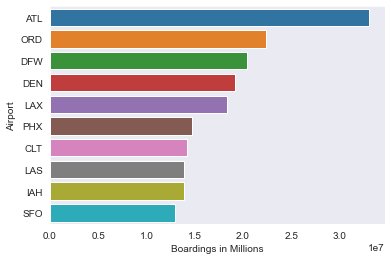

In [7]:
FIELD_TO_PLOT = 'Total'
NUM_ENTRIES = 10


sns.barplot(x=df[FIELD_TO_PLOT], y=df['Code'][:NUM_ENTRIES])

plt.xlabel('Boardings in Millions')
plt.ylabel('Airport')

plt.show()

### Add a slider widget. 
We can add an interactive slider to move between showing one and ten airports. We pass the callback function to interaxt, along with an argument that will be passed to the callback, whose value will be provided by the slider. 

In [8]:
MIN_ENTRIES = 1
MAX_ENTRIES = 10


def update_chart(num_entries):
    ax = sns.barplot(x=df[FIELD_TO_PLOT], y=df['Code'][:num_entries])
    ax.set(xlabel='Boardings in Millions', ylabel='Airport')
    print(plt.xlim(), plt.ylim())
    f = plt.gcf()
    print(f)
    f.set_dpi(1000)
    plt.xlim(0, 40_000_000)
    plt.show()


slider = IntSlider(min=MIN_ENTRIES, max=MAX_ENTRIES,step=1,value=MIN_ENTRIES)
interact(update_chart, num_entries=slider);


interactive(children=(IntSlider(value=1, description='num_entries', max=10, min=1), Output()), _dom_classes=('…